In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.patches import Patch

# Funzione per andare a capo con il titolo del corso
def wrap_text(text, width=25):
    """Spezza il testo rispettando le parole e aggiunge a capo."""
    return '\n'.join(textwrap.wrap(text, width=width))

df = pd.read_csv("udemy_online_education_courses_dataset.csv")

print(df.head())

   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792        

[]

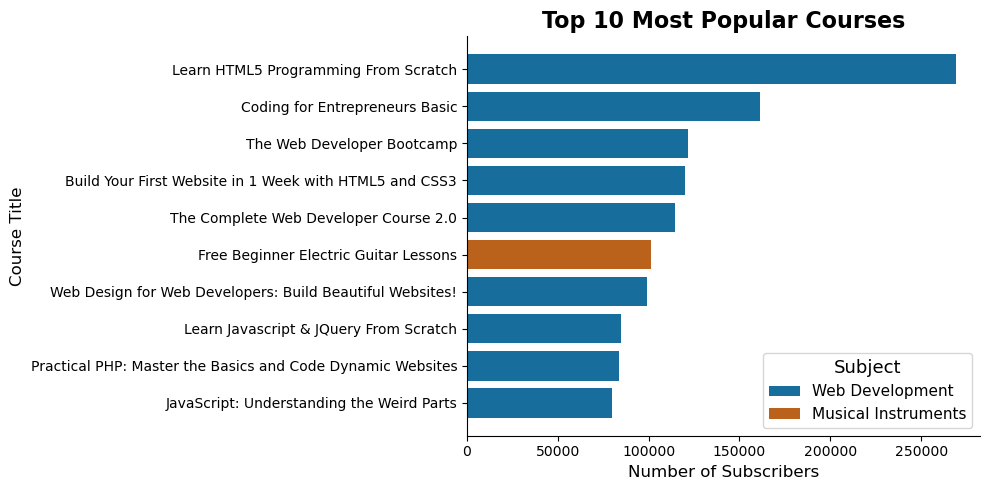

In [2]:
plt.figure(figsize=(10, 5))

# Top 10
top_courses = df.nlargest(10, 'num_subscribers')

subjects_order = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']
subjects = df['subject'].unique()
color_palette = sns.color_palette("colorblind", n_colors=len(subjects))
subject_colors = dict(zip(subjects_order, color_palette))


# Crea il grafico a barre orizzontale
ax = sns.barplot(data=top_courses,y='course_title',x='num_subscribers',  hue='subject', palette=subject_colors)

plt.title('Top 10 Most Popular Courses', fontweight="bold", fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)

plt.legend(title="Subject", loc="lower right", title_fontsize=13, fontsize=11)

# Formatta i numeri per maggiore leggibilità
plt.tight_layout()
sns.despine()
plt.savefig("Most_Popular_Courses.png")
plt.plot()

[]

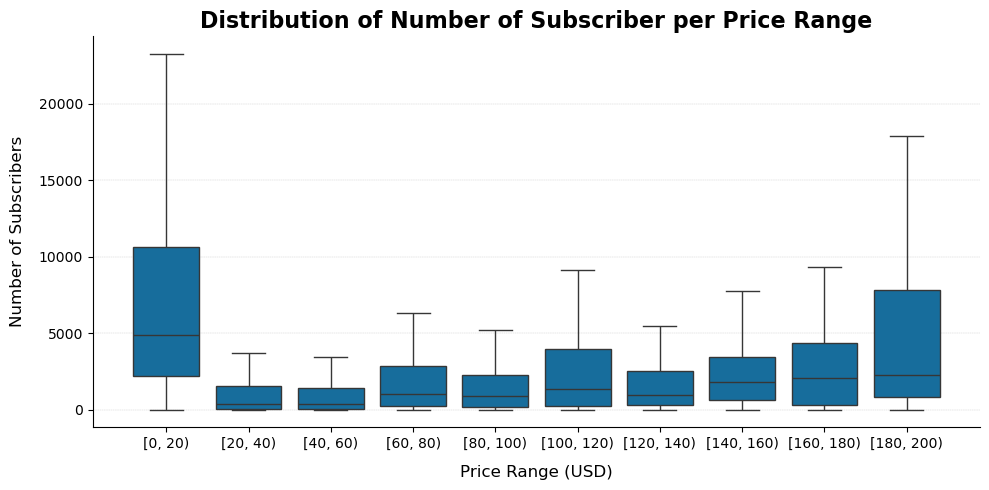

In [3]:
# Trasformazione delle fasce di prezzo
bin_size = 20  # Dimensione della fascia di prezzo
df['price_bin'] = pd.cut(df['price'], bins=range(0, int(df['price'].max()) + bin_size, bin_size), right=False)

# Creazione del box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_bin', y='num_subscribers', data=df, showfliers=False, color=sns.color_palette('colorblind')[0])

# Personalizzazione del grafico
plt.title('Distribution of Number of Subscriber per Price Range', fontweight="bold", fontsize=16)
plt.xlabel('Price Range (USD)', fontsize=12, labelpad= 10)
plt.ylabel('Number of Subscribers', fontsize=12, labelpad=10)
plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0.7)

# Mostra il grafico
plt.tight_layout()
sns.despine()
plt.savefig("Distriibution_Num_Subs_PriceRange.png")
plt.plot()

[]

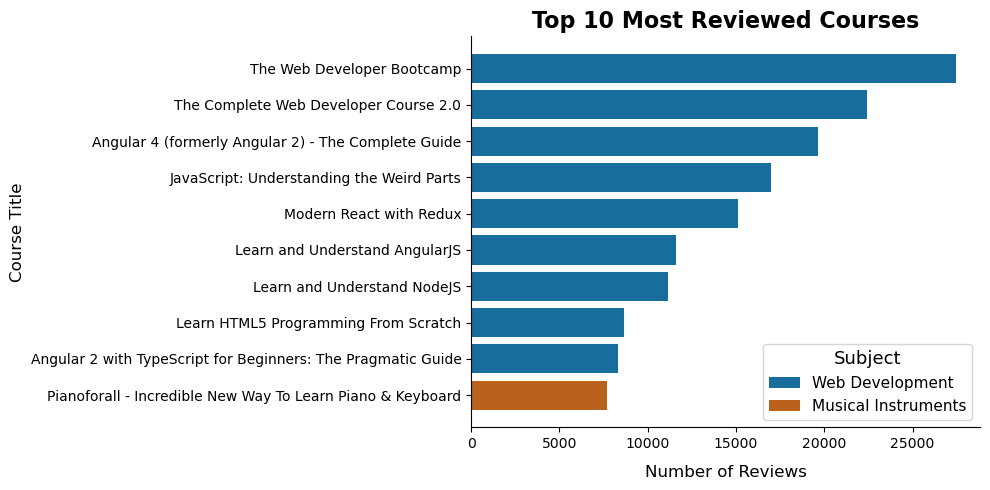

In [4]:
plt.figure(figsize=(10, 5))
top_courses = df.nlargest(10, 'num_reviews')

subjects_order = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']
subjects = df['subject'].unique()
color_palette = sns.color_palette("colorblind", n_colors=len(subjects))
subject_colors = dict(zip(subjects_order, color_palette))

# Crea il grafico a barre orizzontale
ax = sns.barplot(data=top_courses,y='course_title',x='num_reviews', hue='subject', palette=subject_colors)

plt.title('Top 10 Most Reviewed Courses', fontweight="bold", fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12, labelpad=10)
plt.ylabel('Course Title', fontsize=12)

plt.legend(title="Subject", loc="lower right", title_fontsize=13, fontsize=11)

# Formatta i numeri per maggiore leggibilità
sns.despine()
plt.tight_layout()
plt.savefig("Most_Reviewed_Courses.png")
plt.plot()

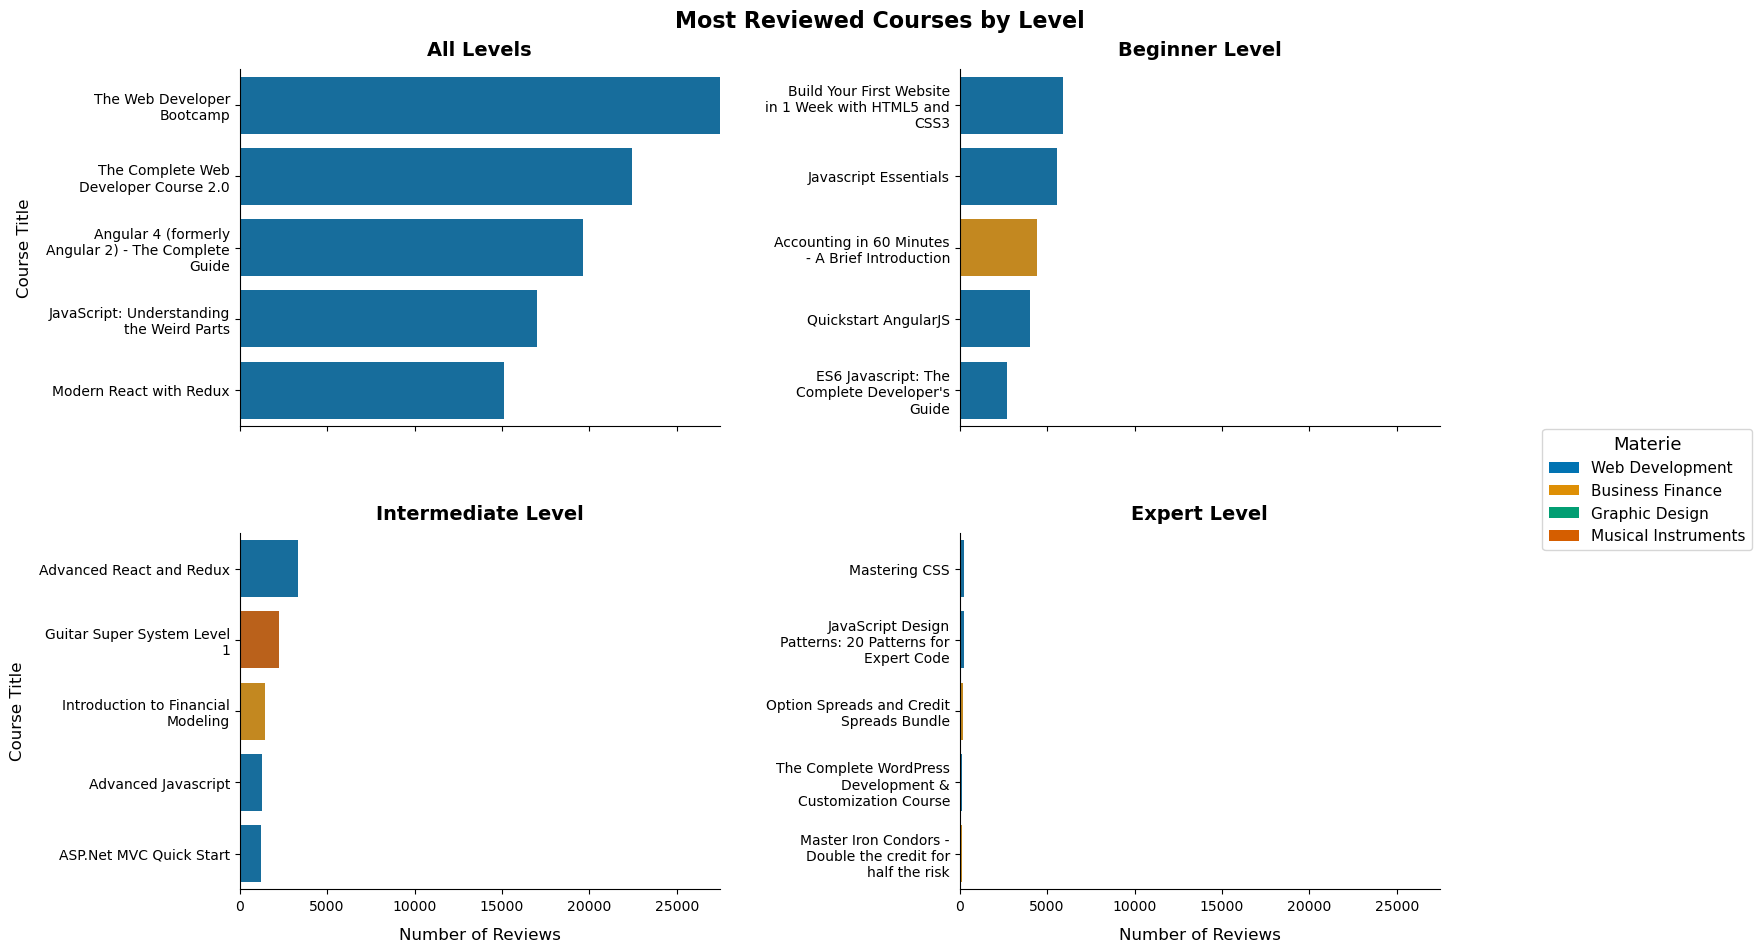

In [5]:
level_order = ['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level']

# Applica la funzione ai titoli dei corsi
df['wrapped_course_title'] = df['course_title'].apply(lambda x: wrap_text(x, width=25))

# Aggiorna il grafico
fig, axes = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0.5})
axes = axes.flatten()

fig.suptitle('Most Reviewed Courses by Level', fontsize=16, fontweight="bold")
# Trova il massimo numero di recensioni
max_reviews = df['num_reviews'].max()

for idx, level in enumerate(level_order):
    ax = axes[idx]
    
    level_data = df[df['level'] == level].nlargest(5, 'num_reviews')
    
    sns.barplot(
        data=level_data,
        y='wrapped_course_title',  # Usa i titoli spezzati
        x='num_reviews',
        hue='subject',
        palette=subject_colors,
        ax=ax
    )
    
    ax.set_title(level, fontsize=14, fontweight="bold", pad=10)
    
    if idx < 2:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Number of Reviews', fontsize=12, labelpad=10)
    
    ax.set_ylabel('' if idx % 2 == 1 else 'Course Title', fontsize=12, labelpad=10)
    
    # Imposta i limiti degli assi x
    ax.set_xlim(0, max_reviews)
    
    # Rimuovi il bordo
    sns.despine(ax=ax)

# Rimuovi le legende dai singoli grafici
for ax in axes:
    ax.get_legend().remove()

# Rimuovi subplot vuoti
for ax in axes[len(level_order):]:
    ax.axis('off')

# Legenda comune
legend_elements = [
    Patch(facecolor=color, label=subject)
    for subject, color in subject_colors.items()
]

fig.legend(
    handles=legend_elements,
    title='Materie',
    loc='center right',
    bbox_to_anchor=(1.05, 0.5),
    title_fontsize=13,
    fontsize=11
)

fig.subplots_adjust(top=0.92, bottom=0.1, left=0.1, right=0.85, hspace=0.4, wspace=0.4)

plt.savefig("Most_Reviewed_by_Level.png", bbox_inches="tight")
plt.show()

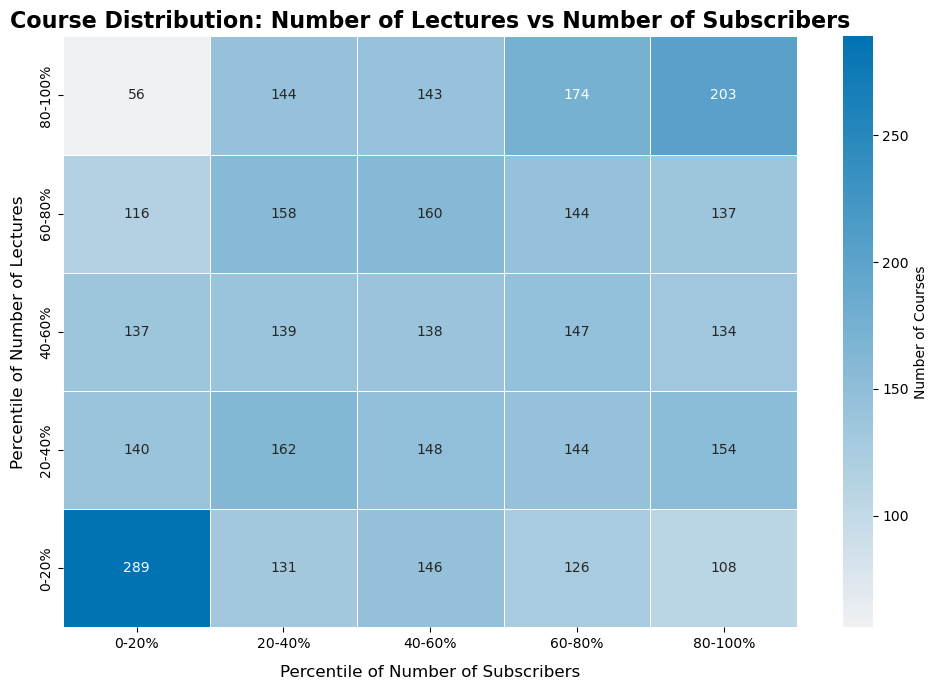

In [6]:
# Creazione dei percentili
df['lecture_percentile'] = pd.qcut(df['num_lectures'], q=5, labels=["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])
df['subscriber_percentile'] = pd.qcut(df['num_subscribers'], q=5, labels=["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])

# Creazione della tabella pivot
heatmap_data = df.groupby(['lecture_percentile', 'subscriber_percentile'], observed=False).size().unstack(fill_value=0)
heatmap_data = heatmap_data.iloc[::-1]  # Riordina i percentili sull'asse Y

# Heatmap con stile uniforme
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    heatmap_data,
    cmap=sns.light_palette("#0173b2", as_cmap=True),  
    annot=True,    # Mostra i numeri
    fmt="d",       # Formato numerico
    linewidths=0.5,
    cbar_kws={'label': 'Number of Courses'}  # Etichetta per la barra dei colori
)

# Titolo e etichette
plt.title('Course Distribution: Number of Lectures vs Number of Subscribers', fontweight="bold", fontsize=16)
plt.xlabel('Percentile of Number of Subscribers', fontsize=12, labelpad=10 )
plt.ylabel('Percentile of Number of Lectures', fontsize=12, labelpad=10)

# Miglioramenti estetici
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("Course_Distribution_Heatmap.png")
plt.show()
